In [0]:
import tensorflow as tf

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train, x_test = x_train.reshape(60000,28,28,1), x_test.reshape(10000,28,28,1) # IMPORTANT
x_train, x_test = x_train/255, x_test/255

model = tf.keras.models.Sequential([Conv2D(64,3,activation='relu',input_shape=(28,28,1)),
                                    MaxPool2D(2,2),
                                    Conv2D(64,3, activation='relu'),
                                    MaxPool2D(2,2),
                                    Flatten(),
                                    Dense(128,activation='relu'),
                                    Dense(10,activation="softmax")
                                    ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


class accCallback(tf.keras.callbacks.Callback): # my callback inheriting keras Callback base class
  def __init__(self, acc_thresh):
    self.acc_thresh = acc_thresh

  def on_epoch_end(self,epoch,logs={}):
    if (logs.get('accuracy')>=self.acc_thresh):
      print("\nReached {}% accuracy so cancelling training!".format(self.acc_thresh*100))
      self.model.stop_training = True


model.fit(x_train,y_train,epochs=20,callbacks=[accCallback(0.998)])


11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/20
1875/1875 [==============================] - 78s 42ms/step - loss: 0.1286 - accuracy: 0.9602
Epoch 2/20
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0406 - accuracy: 0.9875
Epoch 3/20
1875/1875 [==============================] - 78s 41ms/step - loss: 0.0271 - accuracy: 0.9912
Epoch 4/20
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0200 - accuracy: 0.9934
Epoch 5/20
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0155 - accuracy: 0.9949
Epoch 6/20
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0122 - accuracy: 0.9960
Epoch 7/20
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0086 - accuracy: 0.9969
Epoch 8/20
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0080 - accuracy: 0.9974
Epoch 9/20
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0077 - accuracy: 0.9974

In [0]:
model.evaluate(x_test, y_test)

classifications = model.predict(x_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.0411 - accuracy: 0.9919


In [0]:
import numpy as np


print(classifications[451])

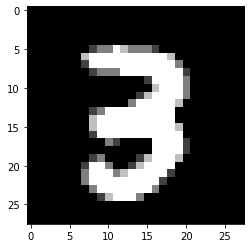

In [0]:
import matplotlib.pyplot as plt

plt.imshow(x_test[451,:,:,0],cmap='gray')